In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\notes\Machine Learning\py-master\ML\14_naive_bayes\spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  MultinomialNB
from sklearn.svm import SVC

In [5]:
le = LabelEncoder()
cont_vect = CountVectorizer(analyzer='word')
tree = DecisionTreeClassifier()
ran = RandomForestClassifier()
lr = LogisticRegression()
mul_nb = MultinomialNB()
svc = SVC(kernel= 'linear')

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['le_category'] = le.fit_transform(df['Category'])
cont_vect_message = cont_vect.fit_transform(df['Message'])
cont_vect_message

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [8]:
X = cont_vect_message
y = df['le_category']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [10]:
tree.fit(X_train,y_train) 
ran.fit(X_train,y_train) 
lr.fit(X_train,y_train) 
mul_nb.fit(X_train,y_train) 
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
print('DecisionTreeClassifier',  tree.score(X_test,y_test))
print('RandomForestClassifier',  ran.score(X_test,y_test))
print('LogisticRegression',  lr.score(X_test,y_test))
print('MultinomialNB',  mul_nb.score(X_test,y_test))
print('SVC',  svc.score(X_test,y_test))

DecisionTreeClassifier 0.9714747039827771
RandomForestClassifier 0.9736275565123789
LogisticRegression 0.9768568353067815
MultinomialNB 0.9822389666307858
SVC 0.9833153928955867


In [20]:
emails = [
         'Hey mohan, can we get together to watch football game tomorrow?',
          'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails = emails
emails_count = cont_vect.fit_transform(emails)
#mul_nb.predict(emails_count)

In [21]:
print(mul_nb.predict(X_test))
print(np.array(y_test))

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [26]:
pred = mul_nb.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, pred)
print(con)

[[1597   18]
 [  15  228]]


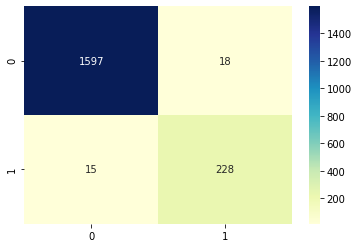

In [24]:
sns.heatmap(con, annot=True, linecolor='red',cmap="YlGnBu",fmt="d")